# 9-1. 순차 데이터 & 순환 신경망

# 9-2. 순환 신경망을 만들고 텍스트 분류

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(x_train_all,y_train_all),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=100)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\황윤재\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\황윤재\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

In [2]:
print(x_train_all.shape,y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
for i in range(len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i] if w>2]
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
word_to_index=imdb.get_word_index()
word_to_index['movie']

17

In [34]:
index_to_word={word_to_index[k]: k for k in word_to_index}
print(index_to_word[17])
for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ')     #왜 w-3..?

movie
film just brilliant casting story direction really part they played you could just imagine being there robert an amazing actor now same being director father came from same myself so loved fact there real film throughout film were great just brilliant so much film soon released would recommend everyone watch amazing really at end so sad you know what they say if you at film must have been good definitely also two little played paul they were just brilliant children are often left out think because stars play them all up are such big whole film but these children are amazing should be what they have done don't you think whole story so because true life after all us all 

In [7]:
print(len(x_train_all[0]),len(x_train_all[1]))

59 32


In [8]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [9]:
np.random.seed(42)
random_index=np.random.permutation(25000)
x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [10]:
from tensorflow.keras.preprocessing import sequence

maxlen=100         #100이 아니면 오류인듯..? 그건 아니다.
x_train_seq=sequence.pad_sequences(x_train,maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val,maxlen=maxlen)

In [11]:
print(x_train_seq.shape,x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [13]:
from tensorflow.keras.utils import to_categorical

x_train_onehot=to_categorical(x_train_seq)
x_val_onehot=to_categorical(x_val_seq)

In [14]:
print(x_train_onehot.shape)
print(x_train_onehot.nbytes)

(20000, 100, 100)
800000000


In [15]:
'''a=np.array([1,10,2,11,3,12,4,13,5,14,6,15,7,16,8,17,9,18])
a=a.reshape(3,3,2)
print(a.swapaxes(0,1))
print(a)
a[:-1][::-1]'''
c=[np.zeros((2,3))]
c.append(np.zeros((4,5)))
d=np.array([1,0,1,0,1,0,1])
d=d.reshape(-1,1)
print(d.shape)

(7, 1)


In [16]:
class RecurrentNetwork:
    def __init__(self,n_cells=10,batch_size=32,learning_rate=0.1):
        self.n_cells=n_cells
        self.batch_size=batch_size
        self.w1h=None     #[n_cells,n_cells]
        self.w1x=None     #[타임슬랩(특성개수),n_cells]  
        self.b1=None      #[n_cells,]
        self.w2=None      #[n_cells,]
        self.b2=None      #1
        self.h=None       #[타임스텝,n_cells]로 이루어진 array   array의 index 개수는 타임슬랩 개수
        self.losses=[]
        self.val_losses=[]
        self.lr=learning_rate
        
    def forpass(self,x):
        self.h=[np.zeros((x.shape[0],self.n_cells))]
        seq=np.swapaxes(x,0,1)
        for x in seq:
            z1=np.dot(x,self.w1x)+np.dot(self.h[-1],self.w1h)+self.b1
            h=np.tanh(z1)
            self.h.append(h)
            z2=np.dot(h,self.w2)+self.b2
        return z2
        
    def backprop(self,x,err):
        m=len(x)
        w2_grad=np.dot(self.h[-1].T,err)/m
        b2_grad=np.sum(err)/m
        seq=np.swapaxes(x,0,1)
        w1h_grad=w1x_grad=b1_grad=0
        err_to_cell=np.dot(err,self.w2.T)*(1-self.h[-1]**2)    #[sample,n_cells]
        for x,h in zip(seq[::-1][:10],self.h[:-1][::-1][:10]):
            w1h_grad+=np.dot(h.T,err_to_cell)
            w1x_grad+=np.dot(x.T,err_to_cell)
            b1_grad+=np.sum(err_to_cell,axis=0)
            err_to_cell=np.dot(err_to_cell,self.w1h)*(1-h**2)
        w1h_grad/=m
        w1x_grad/=m
        b1_grad/=m         
        return w1h_grad,w1x_grad,b1_grad,w2_grad,b2_grad
    
    def sigmoid(self,z):
        a=1/(1+np.exp(-z))
        return a
    
    def init_weights(self,n_features,n_classes):
        orth_init=tf.initializers.Orthogonal()
        glorot_init=tf.initializers.GlorotUniform()
        
        self.w1h=orth_init((self.n_cells,self.n_cells)).numpy()
        self.w1x=glorot_init((n_features,self.n_cells)).numpy()
        self.b1=np.zeros(self.n_cells)
        self.w2=glorot_init((self.n_cells,n_classes)).numpy()
        self.b2=np.zeros(n_classes)
        
    def fit(self,x,y,x_val=None,y_val=None,epochs=100):
        y=y.reshape(-1,1)
        y_val=y_val.reshape(-1,1)
        np.random.seed(42)
        self.init_weights(x.shape[2],y.shape[1])
        for i in range(epochs):
            print('에포크',i,end=' ')
            batch_losses=[]
            for x_batch,y_batch in self.gen_batch(x,y):
                print('.', end='')
                a=self.training(x_batch,y_batch)
                a=np.clip(a,1e-10,1-1e-10)
                loss=np.mean(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            self.update_val_loss(x_val,y_val)
            
    def gen_batch(self,x,y):
        length=len(x)
        bins=length//self.batch_size
        if length%self.batch_size:
            bins+=1
        indexes=np.random.permutation(np.arange(len(x)))
        x=x[indexes]
        y=y[indexes]
        for i in range(bins):
            start=self.batch_size*i
            end=self.batch_size*(i+1)
            yield x[start:end],y[start:end]
    
    def training(self,x,y):
        m=len(x)
        z=self.forpass(x)
        a=self.sigmoid(z)
        err=-(y-a)
        w1h_grad,w1x_grad,b1_grad,w2_grad,b2_grad=self.backprop(x,err)
        self.w1h-=self.lr*w1h_grad
        self.w1x-=self.lr*w1x_grad
        self.b1-=self.lr*b1_grad
        self.w2-=self.lr*w2_grad
        self.b2-=self.lr*b2_grad
        return a
    
    def predict(self,x):
        z=self.forpass(x)
        return z>0
    
    def score(self,x,y):
        return np.mean(self.predict(x)==y.reshape(-1,1))
    
    def update_val_loss(self,x_val,y_val):
        z=self.forpass(x_val)
        a=self.sigmoid(z)
        a=np.clip(a,1e-10,1-1e-10)
        val_loss=np.mean(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [17]:
rn=RecurrentNetwork(n_cells=32,batch_size=32,learning_rate=0.01)

rn.fit(x_train_onehot,y_train,x_val_onehot,y_val,20)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

에포크 12 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 13 ........................................................................................................................................................................................................................................................................................................................................................................

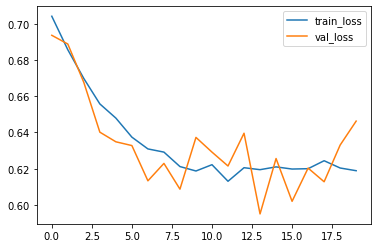

0.6182

In [18]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.legend(['train_loss','val_loss'])
plt.show()

rn.score(x_val_onehot,y_val)

# 9-3. 텐서플로 활용

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [20]:
model=Sequential()
model.add(SimpleRNN(32,input_shape=(100,100)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_onehot,y_train,epochs=20,batch_size=32,validation_data=(x_val_onehot,y_val))

Epoch 1/20
625/625 [==============================] - 10s 14ms/step - loss: 0.7034 - accuracy: 0.5179 - val_loss: 0.6914 - val_accuracy: 0.5512
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6699 - accuracy: 0.5915 - val_loss: 0.6484 - val_accuracy: 0.6246
Epoch 3/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6488 - accuracy: 0.6251 - val_loss: 0.6407 - val_accuracy: 0.6358
Epoch 4/20
625/625 [==============================] - 7s 12ms/step - loss: 0.6353 - accuracy: 0.6437 - val_loss: 0.6328 - val_accuracy: 0.6432
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.6120 - accuracy: 0.6669 - val_loss: 0.6043 - val_accuracy: 0.6784
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6076 - accuracy: 0.6733 - val_loss: 0.5878 - val_accuracy: 0.6918
Epoch 7/20
625/625 [==============================] - 7s 12ms/step - loss: 0.5959 - accuracy: 0.6852 - val_loss: 0.5770 - val_accuracy: 0.704

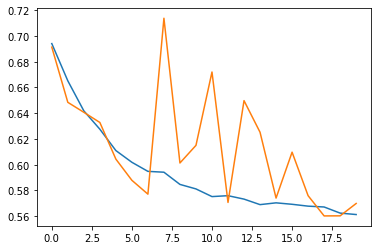

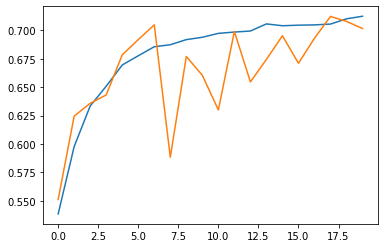

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [23]:
loss,accuracy=model.evaluate(x_val_onehot,y_val,verbose=0)
print(accuracy)

0.7016000151634216


In [24]:
from tensorflow.keras.layers import Embedding

(x_train_all,y_train_all),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i] if w>2]

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\황윤재\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\황윤재\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

In [25]:
maxlen=100
x_train_seq=sequence.pad_sequences(x_train,maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val,maxlen=maxlen)

In [26]:
model_ebd=Sequential()
model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1,activation='sigmoid'))
model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_ebd.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_ebd.fit(x_train_seq,y_train,epochs=10,batch_size=32,validation_data=(x_val_seq,y_val))

Epoch 1/10
625/625 [==============================] - 11s 16ms/step - loss: 0.6837 - accuracy: 0.5380 - val_loss: 0.5092 - val_accuracy: 0.7600
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.4468 - accuracy: 0.8027 - val_loss: 0.4526 - val_accuracy: 0.7948
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3903 - accuracy: 0.8346 - val_loss: 0.4617 - val_accuracy: 0.7946
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3360 - accuracy: 0.8653 - val_loss: 0.4405 - val_accuracy: 0.8152
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2896 - accuracy: 0.8858 - val_loss: 0.4398 - val_accuracy: 0.8126
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2496 - accuracy: 0.9072 - val_loss: 0.4498 - val_accuracy: 0.8216
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2376 - accuracy: 0.9117 - val_loss: 0.4634 - val_accuracy: 0.818

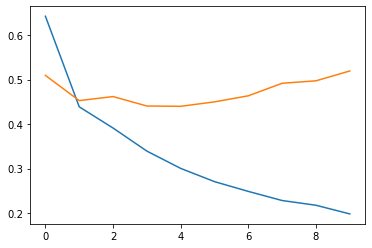

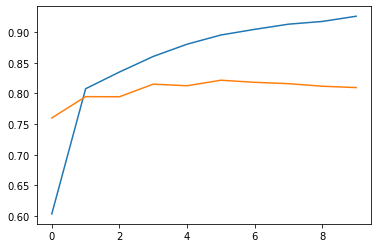

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [29]:
loss,accuracy=model_ebd.evaluate(x_val_seq,y_val,verbose=0)
print(accuracy)

0.8095999956130981


# 9-4. LSTM 순환 신경망

In [30]:
from tensorflow.keras.layers import LSTM

model_lstm=Sequential()
model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model_lstm.fit(x_train_seq,y_train,epochs=10,batch_size=32,validation_data=(x_val_seq,y_val))

Epoch 1/10
625/625 [==============================] - 16s 23ms/step - loss: 0.5602 - accuracy: 0.7060 - val_loss: 0.3776 - val_accuracy: 0.8388
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.3436 - accuracy: 0.8599 - val_loss: 0.3769 - val_accuracy: 0.8396
Epoch 3/10
625/625 [==============================] - 13s 22ms/step - loss: 0.3106 - accuracy: 0.8695 - val_loss: 0.3571 - val_accuracy: 0.8462
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2934 - accuracy: 0.8797 - val_loss: 0.3590 - val_accuracy: 0.8430
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2754 - accuracy: 0.8863 - val_loss: 0.3667 - val_accuracy: 0.8444
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.2737 - accuracy: 0.8827 - val_loss: 0.3675 - val_accuracy: 0.8420
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2694 - accuracy: 0.8853 - val_loss: 0.3748 - val_accuracy:

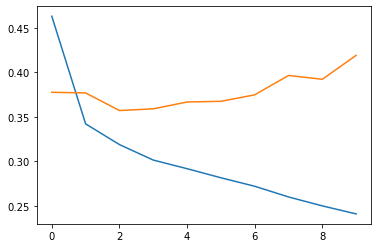

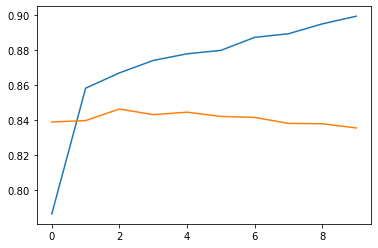

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [33]:
loss,accurcy=model_lstm.evaluate(x_val_seq,y_val,verbose=0)     #embedding만 한거랑 똑같은 결과?
print(accuracy)

0.8095999956130981
